In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prof = pd.read_csv("./profiles.csv")

In [4]:
# m - mandatory, 
# i - "m", if the "implies" column is implemented,
# o - optional, 
# n - non-profile options, 
# p - part of an optional extension but not an optional extension itself

In [5]:
new_p = prof.set_index('extension')

In [6]:
value_counts = new_p.replace('?',pd.NA).replace('n',pd.NA).replace('i','o').replace('p','o').apply(pd.Series.value_counts).fillna(0)

In [7]:
value_counts.loc['sum'] = value_counts.sum()

In [8]:
value_counts.loc['sum']

RVI20                    12
RVA20 \n(64 only) – U    17
RVA20 \n(64 only) – S    29
RVA22 \n(64 only) – U    44
RVA22 \n(64 only) – S    71
RVI23 – U                54
RVA23 (64 only) – U      58
RVA23 (64 only) – S      90
RVB23 (64 only) – U      64
RVB23 (64 only) – S      95
Name: sum, dtype: int64

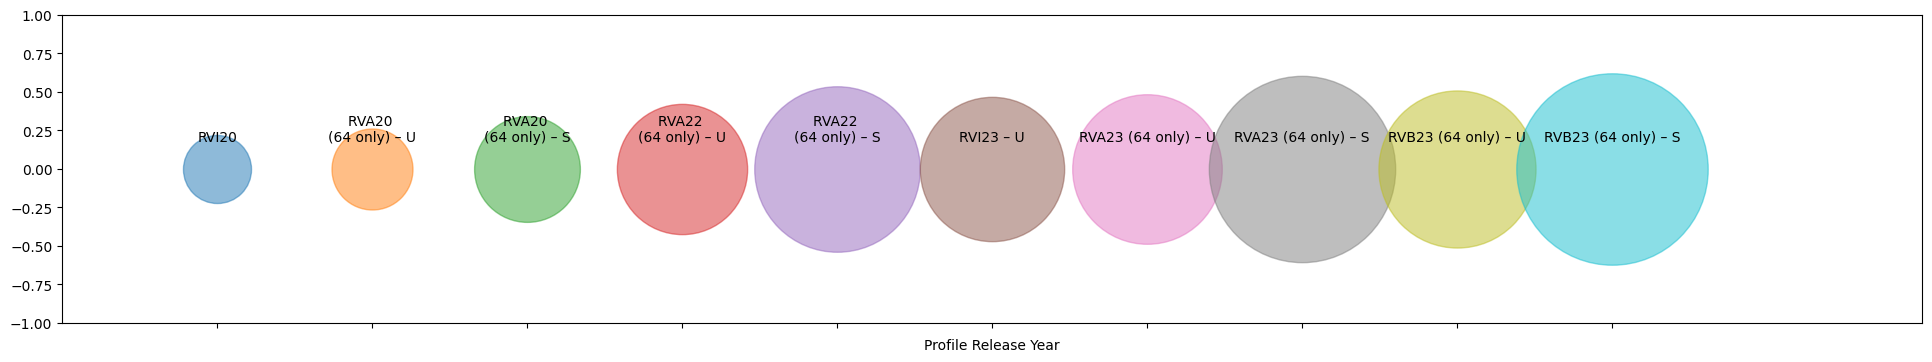

In [9]:
value_counts = new_p.replace('?',pd.NA).replace('n',pd.NA).apply(pd.Series.value_counts).fillna(0)
value_counts.loc['sum'] = value_counts.sum()
d = value_counts.loc['sum']

fig, ax = plt.subplots(figsize=(24,4))

for i, (key, value) in enumerate(d.items()):
    ax.scatter(i, 0, s=value*200, alpha=0.5)  
    ax.annotate(key.replace("\r", ""), (i, 0), textcoords="offset points", xytext=(0,20), ha='center')  

ax.set_xlim(-1, len(d)+1)
ax.set_ylim(-1, 1)
ax.set_xticks(range(len(d)))
ax.set_xticklabels([]) 
ax.set_xlabel("Profile Release Year")

plt.show()


In [10]:
new_p.apply(pd.Series.value_counts).fillna(0)

,RVI20,RVA20 \n(64 only) – U,RVA20 \n(64 only) – S,RVA22 \n(64 only) – U,RVA22 \n(64 only) – S,RVI23 – U,RVA23 (64 only) – U,RVA23 (64 only) – S,RVB23 (64 only) – U,RVB23 (64 only) – S
?,0.0,0.0,1.0,0.0,2,6.0,1.0,6,1.0,6
i,0.0,0.0,0.0,0.0,7,0.0,0.0,7,0.0,7
m,1.0,14.0,23.0,27.0,36,1.0,37.0,54,33.0,48
n,166.0,162.0,148.0,135.0,105,113.0,115.0,77,102.0,67
o,9.0,1.0,4.0,7.0,18,53.0,16.0,24,26.0,35
p,2.0,2.0,2.0,10.0,10,0.0,5.0,5,5.0,5


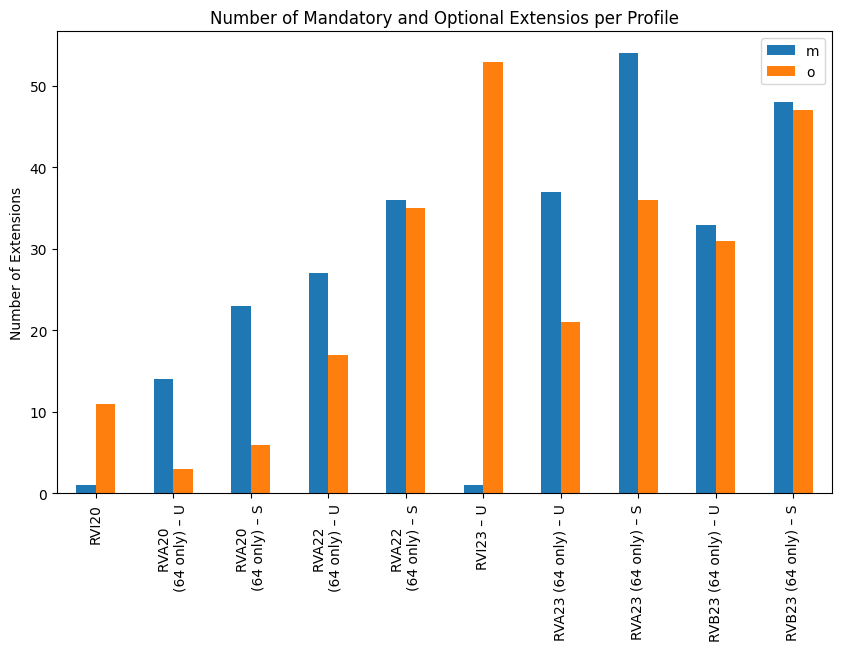

In [11]:
value_counts = new_p.replace('?',pd.NA).replace('n',pd.NA).replace('i','o').replace('p','o').apply(pd.Series.value_counts).fillna(0)

value_counts = value_counts.T
ax = value_counts.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number of Extensions')
plt.title('Number of Mandatory and Optional Extensios per Profile')
plt.show()

In [12]:
new_p = new_p.applymap(lambda x: False if x == 'n' else True)

C:\Users\ICO\AppData\Local\Temp\ipykernel_6416\2757079236.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_p = new_p.applymap(lambda x: False if x == 'n' else True)


In [13]:
new_p

,RVI20,RVA20 \n(64 only) – U,RVA20 \n(64 only) – S,RVA22 \n(64 only) – U,RVA22 \n(64 only) – S,RVI23 – U,RVA23 (64 only) – U,RVA23 (64 only) – S,RVB23 (64 only) – U,RVB23 (64 only) – S
extension,,,,,,,,,,
A,True,True,True,True,True,True,True,True,True,True
B,False,False,False,True,True,True,True,True,True,True
C,True,True,True,True,True,True,True,True,True,True
D,True,True,True,True,True,True,True,True,True,True
F,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
Zvksc,False,False,False,False,False,False,False,False,True,True
Zvksed,False,False,False,False,False,False,False,False,False,False
Zvksg,False,False,False,False,False,True,True,True,True,True


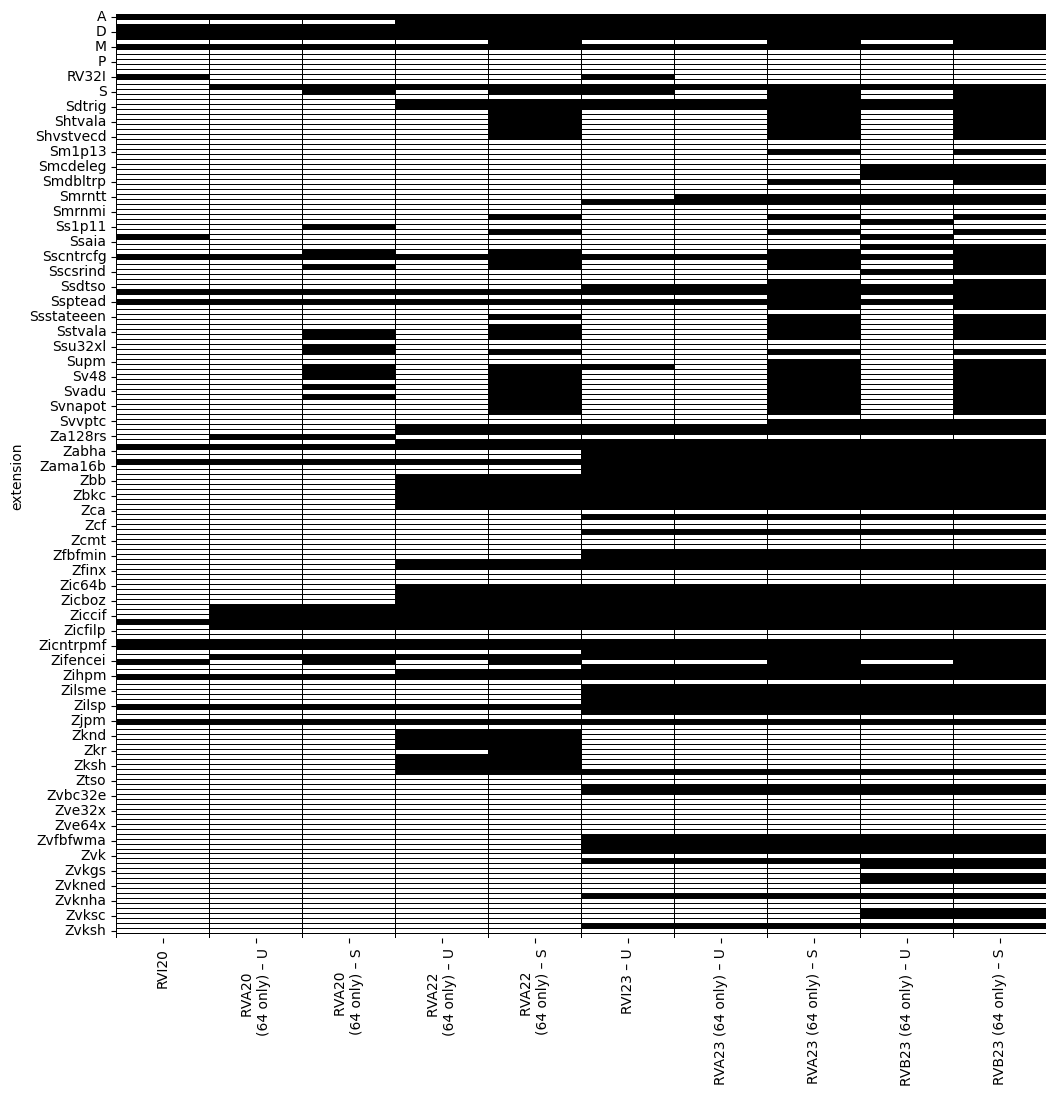

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(new_p,cmap = 'Greys',linecolor='black',cbar=False,linewidths=.5)
plt.show()

In [15]:
new_p.to_csv('./profile_mapping.csv')